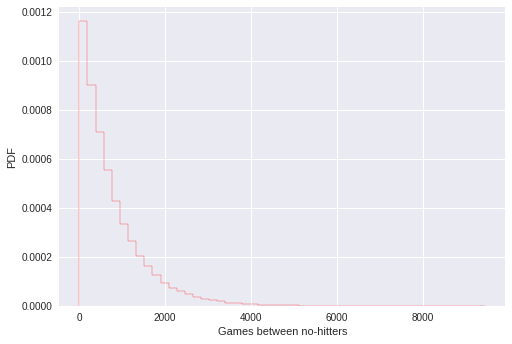

In [0]:
##Parameter Estimation by Optimization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

nohitter_times = np.array(
    [ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
    715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
    104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
    166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
    308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
   1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
     77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
    557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
   1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
    219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
    176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
    774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
    192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
    156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
    576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
   3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
    110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
    192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
   1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
   2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
   1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
    420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
    876,  381,  905,  156,  419,  239,  119,  129,  467])

tau = np.mean(nohitter_times)

inter_nohitter_time = np.random.exponential(tau, 100000)
plt.hist(inter_nohitter_time, bins=50, normed=True, histtype="step", color="red")
plt.xlabel("Games between no-hitters")
plt.ylabel("PDF")
plt.show()

In [0]:
# Empirical Cumulative Distribution Function

def ecdf(data):
    x = np.sort(data)
    n = len(data)
    y = np.arange(1, n+1) / n
    
    return x, y

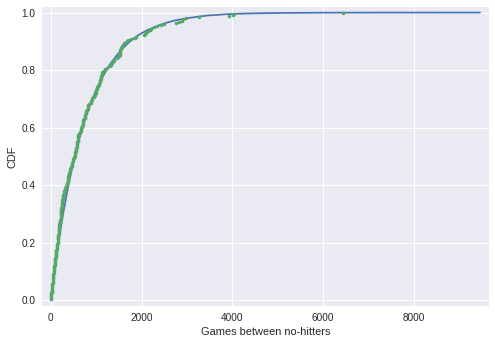

In [0]:
x, y = ecdf(nohitter_times)
x_theor, y_theor = ecdf(inter_nohitter_time)

plt.plot(x_theor, y_theor)
plt.plot(x, y, marker=".", linestyle="none")
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

plt.show()

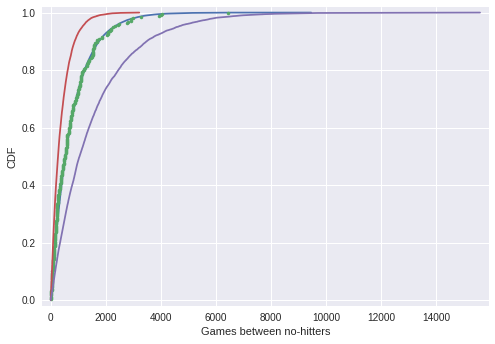

In [0]:
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

samples_half = np.random.exponential(tau/2, 10000)
samples_double = np.random.exponential(2*tau, 10000)

x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

plt.plot(x_half, y_half)
plt.plot(x_double, y_double)
plt.show()

In [0]:
illiteracy = np.array(
        [  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])

fertility = np.array(
        [ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
        1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
        2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
        2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
        4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
        2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
        5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
        5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
        4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
        6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
        5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
        1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
        2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
        2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
        1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502,
        2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152,
        2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822,
        4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 ,
        1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663,
        1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718,
        1.732,  3.928])



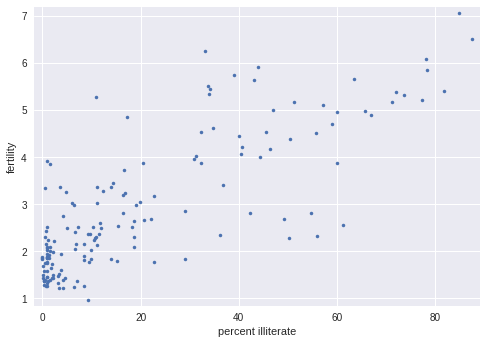

0.8041324026815341


In [0]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')
plt.show()

print(pearson_r(illiteracy, fertility))

slope = 0.04979854809063418 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


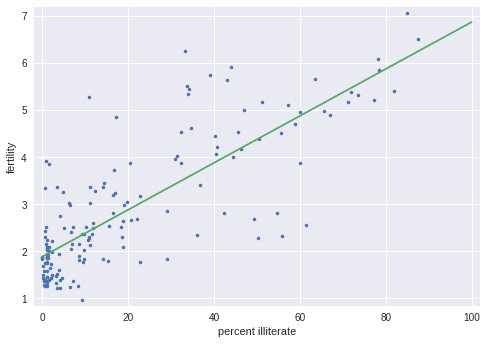

In [0]:
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

a, b = np.polyfit(illiteracy, fertility, 1)

print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

x = np.array([0, 100])
y = a * x + b

_ = plt.plot(x, y)
plt.show()

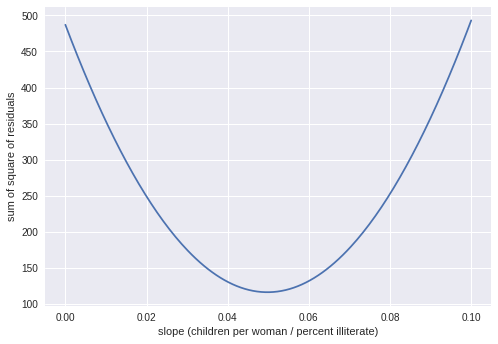

In [0]:
# Computing how the slope varies
a_vals = np.linspace(0, 0.1, 200)

rss = np.empty_like(a_vals)

for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

In [0]:
# Importance of EDA: Anscombe's Quartet

anscombe_df = pd.read_csv("anscombe.csv", header=None)

In [0]:
anscombe_df = anscombe_df.T

In [0]:
anscombe_df.shape

(8, 13)

In [0]:
anscombe_df.set_index(anscombe_df.T.loc[[1], :].values[0], inplace=True)

In [0]:
anscombe_df.drop([0, 1], axis=1, inplace=True)

In [0]:
x = anscombe_df.iloc[0, :].values.astype(np.float64)
y = anscombe_df.iloc[1, :].values.astype(np.float64)

0.5000909090909095 3.000090909090909


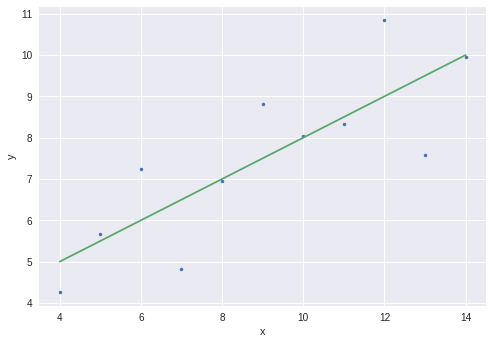

In [0]:
#Simple linear Regression
a, b = np.polyfit(x, y, 1)
print(a, b)

x_theor = np.array([min(x), max(x)])
y_theor = a * x_theor + b

_ = plt.plot(x, y, marker=".", linestyle="none")
_ = plt.plot(x_theor, y_theor)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
x1 = anscombe_df.iloc[0, :].values.astype(np.float64)
y1 = anscombe_df.iloc[1, :].values.astype(np.float64)
x2 = anscombe_df.iloc[2, :].values.astype(np.float64)
y2 = anscombe_df.iloc[3, :].values.astype(np.float64)
x3 = anscombe_df.iloc[4, :].values.astype(np.float64)
y3 = anscombe_df.iloc[5, :].values.astype(np.float64)
x4 = anscombe_df.iloc[6, :].values.astype(np.float64)
y4 = anscombe_df.iloc[7, :].values.astype(np.float64)
anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

In [0]:
for x, y in zip(anscombe_x, anscombe_y):
    a, b = np.polyfit(x, y, 1)
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.000090909090909
slope: 0.5000000000000004 intercept: 3.0009090909090896
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.4999090909090908 intercept: 3.0017272727272735


0.5000909090909095 3.000090909090909
0.5000000000000004 3.0009090909090896
0.4997272727272731 3.0024545454545453
0.4999090909090908 3.0017272727272735


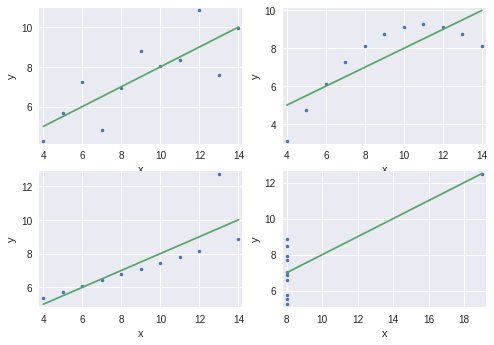

In [0]:
for i, xy in enumerate(zip(anscombe_x, anscombe_y)):
    plt.subplot(2,2,i+1)
    a, b = np.polyfit(xy[0], xy[1], 1)
    print(a, b)

    x_theor = np.array([min(xy[0]), max(xy[0])])
    y_theor = a * x_theor + b

    _ = plt.plot(xy[0], xy[1], marker=".", linestyle="none")
    _ = plt.plot(x_theor, y_theor)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.margins(0.02)

plt.show()

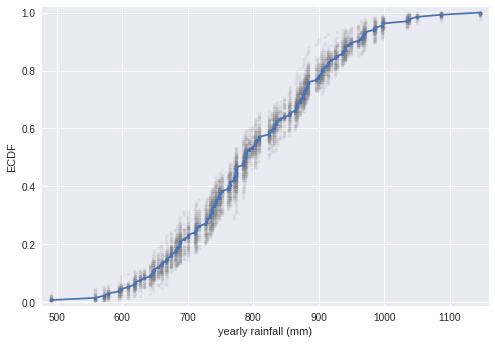

In [0]:
##Bootstraping - The use of resampled data to perform statistical inference
##Bootstrap array - The array obtained by the bootstrapping
##Bootstrap replica - The statistic computed from a resampled array

rainfall=np.array([  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
         915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
         667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
         896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])

for _ in range(50):
    bs_sample = np.random.choice(rainfall, size=len(rainfall))
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

plt.show()

In [0]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

10.510549150506188
10.517201305865491


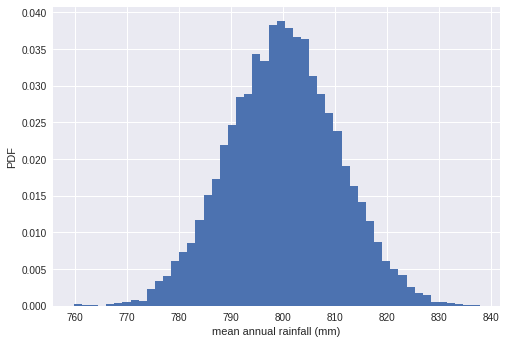

95% confidence interval: [779.32595865 820.85270677]


In [0]:
# standard error of the mean, or SEM = 
# (standard_deviation of data / square-root of length of data)

bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

bs_std = np.std(bs_replicates)
print(bs_std)

plt.hist(bs_replicates, bins=50, normed=True)
plt.xlabel('mean annual rainfall (mm)')
plt.ylabel('PDF')
plt.show()

print("95% confidence interval: " + str(np.percentile(bs_replicates, [2.5, 97.5])))

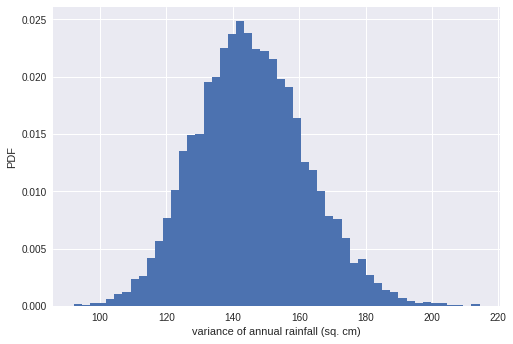

95% confidence interval: [115.1434299  179.63711695]


In [0]:
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)
bs_replicates /=100

_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')
plt.show()

print("95% confidence interval: " + str(np.percentile(bs_replicates, [2.5, 97.5])))

95% confidence interval = [662.25428287 871.47948207] games


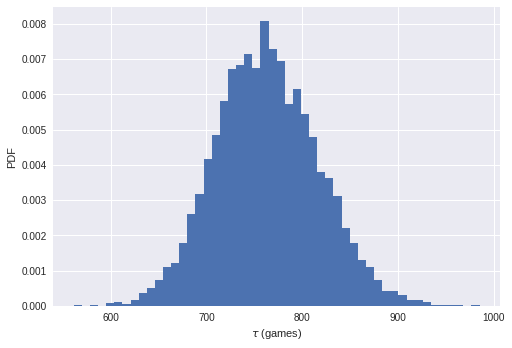

In [0]:
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

print('95% confidence interval =', conf_int, 'games')

_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')
plt.show()

In [0]:
# When we are given a pair of points to plot, then we take the bootstrap replicates as follows

def draw_bs_pairs_linreg(x, y, size=1):
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

[0.0444141  0.05579449]


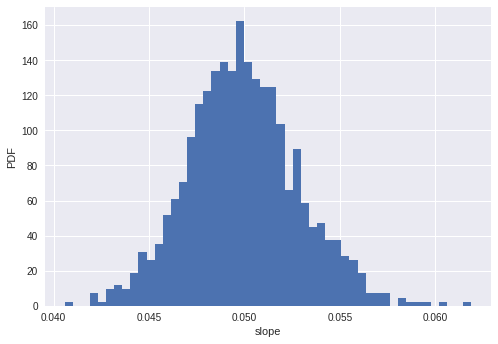

In [0]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

In [0]:
len(bs_slope_reps)

1000

In [0]:
min(illiteracy), max(illiteracy), min(fertility), max(fertility)

(0.0, 87.4, 0.966, 7.069)

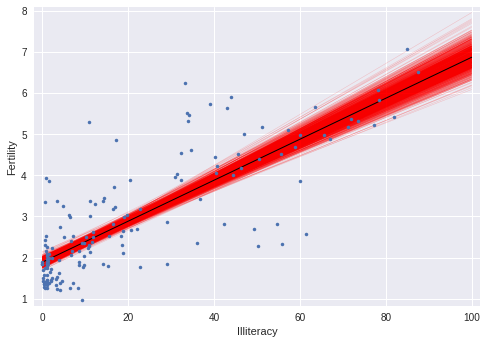

In [0]:
x = np. array([0, 100])

for i in range(1000):
    plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i], 
            linewidth = 0.5, alpha = 0.2, color="red")
    

x_slope, y_inter = np.polyfit(illiteracy, fertility, 1)
plt.plot(x, x_slope*x + y_inter, linewidth = 1, alpha = 1, color="black")
plt.plot(illiteracy, fertility, linestyle = "none", marker=".")

plt.xlabel("Illiteracy")
plt.ylabel("Fertility")
plt.margins(0.02)
plt.show()

In [0]:
##Hypothesis testing

def permutation_sample(data1, data2):
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    return perm_sample_1, perm_sample_2

In [0]:
rain_june = np.array([  66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])

rain_november = np.array([  83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8])

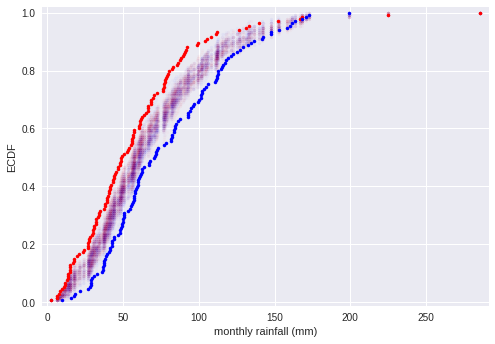

In [0]:
for _ in range(50):
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)

    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

In [0]:
def draw_perm_reps(data_1, data_2, func, size=1):
    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [0]:
# _ = sns.swarmplot("ID", "impact_force", data=df)
# _ = plt.xlabel('frog')
# _ = plt.ylabel('impact force (N)')

# plt.show()

In [0]:
force_a = np.array([ 1.612,  0.605,  0.327,  0.946,  0.541,  1.539,  0.529,  0.628,
        1.453,  0.297,  0.703,  0.269,  0.751,  0.245,  1.182,  0.515,
        0.435,  0.383,  0.457,  0.73 ])

force_b = np.array([ 0.172,  0.142,  0.037,  0.453,  0.355,  0.022,  0.502,  0.273,
        0.72 ,  0.582,  0.198,  0.198,  0.597,  0.516,  0.815,  0.402,
        0.605,  0.711,  0.614,  0.468])

print("Mean frog A force: " + str(np.mean(force_a)))
print("Mean frog B force: " + str(np.mean(force_b)))
len(force_a) + len(force_b)

Mean frog A force: 0.7073500000000001
Mean frog B force: 0.4191000000000001


40

In [0]:
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

empirical_diff_means = diff_of_means(force_a, force_b)
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

print('p-value =', p)

p-value = 0.0065


In [0]:
translated_force_b = force_b - np.mean(force_b) + 0.55 #0.55N is the force of frog C that comes silimar to frog B
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

print('p = ', p)

p =  0.0062


In [0]:
forces_concat = np.concatenate((force_a, force_b))

mean_force = np.mean(forces_concat)

force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)
bs_replicates = bs_replicates_a - bs_replicates_b

p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0051


In [0]:
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    frac = np.sum(dems) / len(dems)
    return frac

perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0


In [0]:
# no-hitters

nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [0]:
nht_diff_obs = diff_of_means(nht_dead, nht_live)
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, size=10000)

p = np.sum(perm_replicates<=nht_diff_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0001


In [0]:
r_obs = pearson_r(illiteracy, fertility)
perm_replicates = np.empty(10000)

for i in range(10000):
    illiteracy_permuted = np.random.permutation(illiteracy)
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


In [0]:
# neonicotinoid insecticides

control=np.array([  4.159234,   4.408002,   0.172812,   3.498278,   3.104912,
         5.164174,   6.615262,   4.633066,   0.170408,   2.65    ,
         0.0875  ,   1.997148,   6.92668 ,   4.574932,   3.896466,
         5.209814,   3.70625 ,   0.      ,   4.62545 ,   3.01444 ,
         0.732652,   0.4     ,   6.518382,   5.225   ,   6.218742,
         6.840358,   1.211308,   0.368252,   3.59937 ,   4.212158,
         6.052364,   2.115532,   6.60413 ,   5.26074 ,   6.05695 ,
         6.481172,   3.171522,   3.057228,   0.218808,   5.215112,
         4.465168,   2.28909 ,   3.732572,   2.17087 ,   1.834326,
         6.074862,   5.841978,   8.524892,   4.698492,   2.965624,
         2.324206,   3.409412,   4.830726,   0.1     ,   0.      ,
         4.101432,   3.478162,   1.009688,   4.999296,   4.32196 ,
         0.299592,   3.606032,   7.54026 ,   4.284024,   0.057494,
         6.036668,   2.924084,   4.150144,   1.256926,   4.666502,
         4.806594,   2.52478 ,   2.027654,   2.52283 ,   4.735598,
         2.033236,   0.      ,   6.177294,   2.601834,   3.544408,
         3.6045  ,   5.520346,   4.80698 ,   3.002478,   3.559816,
         7.075844,  10.      ,   0.139772,   6.17171 ,   3.201232,
         8.459546,   0.17857 ,   7.088276,   5.496662,   5.415086,
         1.932282,   3.02838 ,   7.47996 ,   1.86259 ,   7.838498,
         2.242718,   3.292958,   6.363644,   4.386898,   8.47533 ,
         4.156304,   1.463956,   4.533628,   5.573922,   1.29454 ,
         7.547504,   3.92466 ,   5.820258,   4.118522,   4.125   ,
         2.286698,   0.591882,   1.273124,   0.      ,   0.      ,
         0.      ,  12.22502 ,   7.601604,   5.56798 ,   1.679914,
         8.77096 ,   5.823942,   0.258374,   0.      ,   5.899236,
         5.486354,   2.053148,   3.25541 ,   2.72564 ,   3.364066,
         2.43427 ,   5.282548,   3.963666,   0.24851 ,   0.347916,
         4.046862,   5.461436,   4.066104,   0.      ,   0.065   ])

treated=np.array([ 1.342686,  1.058476,  3.793784,  0.40428 ,  4.528388,  2.142966,
        3.937742,  0.1375  ,  6.919164,  0.      ,  3.597812,  5.196538,
        2.78955 ,  2.3229  ,  1.090636,  5.323916,  1.021618,  0.931836,
        2.78    ,  0.412202,  1.180934,  2.8674  ,  0.      ,  0.064354,
        3.008348,  0.876634,  0.      ,  4.971712,  7.280658,  4.79732 ,
        2.084956,  3.251514,  1.9405  ,  1.566192,  0.58894 ,  5.219658,
        0.977976,  3.124584,  1.297564,  1.433328,  4.24337 ,  0.880964,
        2.376566,  3.763658,  1.918426,  3.74    ,  3.841726,  4.69964 ,
        4.386876,  0.      ,  1.127432,  1.845452,  0.690314,  4.185602,
        2.284732,  7.237594,  2.185148,  2.799124,  3.43218 ,  0.63354 ,
        1.142496,  0.586   ,  2.372858,  1.80032 ,  3.329306,  4.028804,
        3.474156,  7.508752,  2.032824,  1.336556,  1.906496,  1.396046,
        2.488104,  4.759114,  1.07853 ,  3.19927 ,  3.814252,  4.275962,
        2.817056,  0.552198,  3.27194 ,  5.11525 ,  2.064628,  0.      ,
        3.34101 ,  6.177322,  0.      ,  3.66415 ,  2.352582,  1.531696])

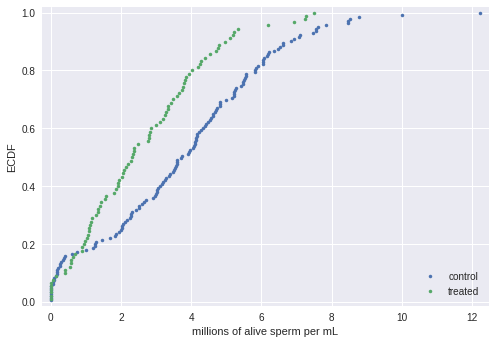

In [0]:
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

plt.margins(0.02)
plt.legend(('control', 'treated'), loc='lower right')

plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

In [0]:
finch_1975 = pd.read_csv("finch_beaks_1975.csv")
finch_2012 = pd.read_csv("finch_beaks_2012.csv")

finch_1975["year"] = 1975
finch_2012["year"] = 2012

finch_1975.columns = ['band', 'species', 'Beak length, mm', 'beak_depth', 'year']
finch_2012.columns = ['band', 'species', 'blength', 'beak_depth', 'year']

In [0]:
finch_1975.columns, finch_2012.columns

(Index(['band', 'species', 'Beak length, mm', 'beak_depth', 'year'], dtype='object'),
 Index(['band', 'species', 'blength', 'beak_depth', 'year'], dtype='object'))

In [0]:
finch_1975.shape, finch_2012.shape

((403, 5), (248, 5))

In [0]:
df = finch_1975.loc[:, ["beak_depth", "year"]].append(finch_2012.loc[:, ["beak_depth", "year"]])

In [0]:
df.columns, df.year.unique(), df.shape

(Index(['beak_depth', 'year'], dtype='object'), array([1975, 2012]), (651, 2))

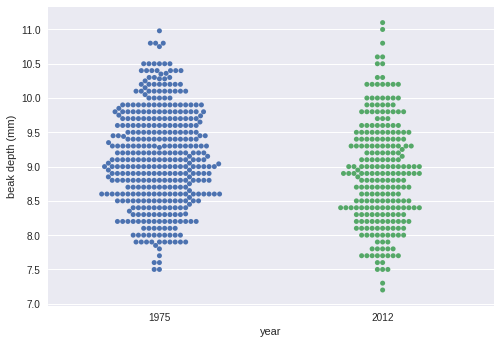

In [0]:
_ = sns.swarmplot("year", "beak_depth", data=df)

_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

plt.show()

In [0]:
bd_1975 = finch_1975["beak_depth"].values
bd_2012 = finch_2012["beak_depth"].values

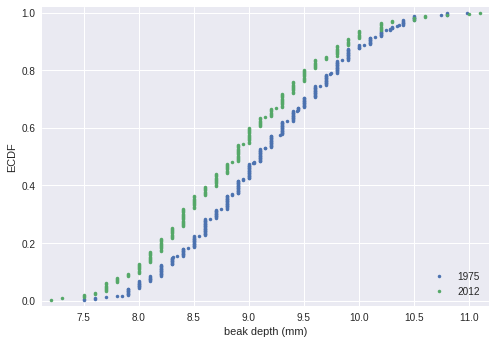

In [0]:
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

plt.show()

In [0]:
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = -0.22313275434243174 mm
95% confidence interval = [-0.34068331 -0.10911849] mm


In [0]:
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

print('p =', p)

p = 0.9999


In [0]:
bl_1975 = finch_1975['Beak length, mm'].values
bl_2012 = finch_2012["blength"].values

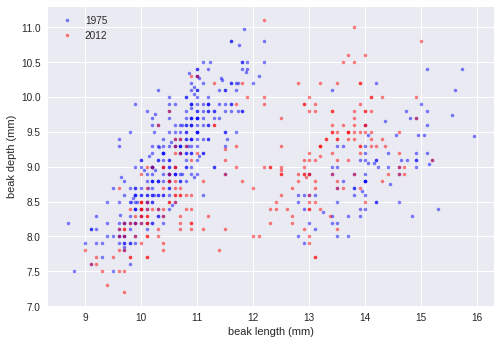

In [0]:
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', alpha=0.5, color="blue")

_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', alpha=0.5, color="red")

_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

plt.show()

In [0]:
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, size=1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, size=1000)

slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])


print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.09459683208921148 conf int = [0.05734613 0.1341127 ]
1975: intercept = 8.053907980716426 conf int = [7.604195  8.4862005]
2012: slope = 0.279421483961125 conf int = [0.23806841 0.32110513]
2012: intercept = 5.548559204612315 conf int = [5.0570535  6.04475884]


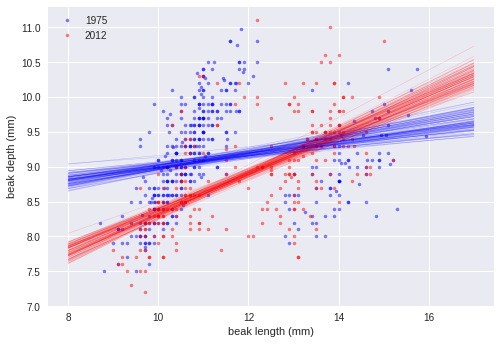

In [0]:
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

x = np.array([8, 17])

for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color="blue")
    plt.plot(x, bs_slope_reps_2012[i]*x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color="red")

plt.show()

In [0]:
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.2461609991094327 conf int = [1.22354904 1.27062931]
2012: mean ratio = 1.3483617710027853 conf int = [1.3242628  1.37192989]


In [0]:
scandens = pd.read_csv("scandens_beak_depth_heredity.csv")

In [0]:
scandens.columns, scandens.shape

(Index(['mid_parent', 'mid_offspring'], dtype='object'), (130, 2))

In [0]:
fortis = pd.read_csv("fortis_beak_depth_heredity.csv")

In [0]:
fortis.columns, fortis.shape

(Index(['Mid-offspr', 'Male BD', 'Female BD'], dtype='object'), (413, 3))

In [0]:
fortis.head()

,Mid-offspr,Male BD,Female BD
0,10.70,10.90,9.3
1,9.78,10.70,8.4
2,9.48,10.70,8.1
3,9.60,10.70,9.8
4,10.27,9.85,10.4


In [0]:
fortis["mid_parent"] = np.array([ 10.1  ,   9.55 ,   9.4  ,  10.25 ,  10.125,   9.7  ,   9.05 ,
         7.4  ,   9.   ,   8.65 ,   9.625,   9.9  ,   9.55 ,   9.05 ,
         8.35 ,  10.1  ,  10.1  ,   9.9  ,  10.225,  10.   ,  10.55 ,
        10.45 ,   9.2  ,  10.2  ,   8.95 ,  10.05 ,  10.2  ,   9.5  ,
         9.925,   9.95 ,  10.05 ,   8.75 ,   9.2  ,  10.15 ,   9.8  ,
        10.7  ,  10.5  ,   9.55 ,  10.55 ,  10.475,   8.65 ,  10.7  ,
         9.1  ,   9.4  ,  10.3  ,   9.65 ,   9.5  ,   9.7  ,  10.525,
         9.95 ,  10.1  ,   9.75 ,  10.05 ,   9.9  ,  10.   ,   9.1  ,
         9.45 ,   9.25 ,   9.5  ,  10.   ,  10.525,   9.9  ,  10.4  ,
         8.95 ,   9.4  ,  10.95 ,  10.75 ,  10.1  ,   8.05 ,   9.1  ,
         9.55 ,   9.05 ,  10.2  ,  10.   ,  10.55 ,  10.75 ,   8.175,
         9.7  ,   8.8  ,  10.75 ,   9.3  ,   9.7  ,   9.6  ,   9.75 ,
         9.6  ,  10.45 ,  11.   ,  10.85 ,  10.15 ,  10.35 ,  10.4  ,
         9.95 ,   9.1  ,  10.1  ,   9.85 ,   9.625,   9.475,   9.   ,
         9.25 ,   9.1  ,   9.25 ,   9.2  ,   9.95 ,   8.65 ,   9.8  ,
         9.4  ,   9.   ,   8.55 ,   8.75 ,   9.65 ,   8.95 ,   9.15 ,
         9.85 ,  10.225,   9.825,  10.   ,   9.425,  10.4  ,   9.875,
         8.95 ,   8.9  ,   9.35 ,  10.425,  10.   ,  10.175,   9.875,
         9.875,   9.15 ,   9.45 ,   9.025,   9.7  ,   9.7  ,  10.05 ,
        10.3  ,   9.6  ,  10.   ,   9.8  ,  10.05 ,   8.75 ,  10.55 ,
         9.7  ,  10.   ,   9.85 ,   9.8  ,   9.175,   9.65 ,   9.55 ,
         9.9  ,  11.55 ,  11.3  ,  10.4  ,  10.8  ,   9.8  ,  10.45 ,
        10.   ,  10.75 ,   9.35 ,  10.75 ,   9.175,   9.65 ,   8.8  ,
        10.55 ,  10.675,   9.95 ,   9.55 ,   8.825,   9.7  ,   9.85 ,
         9.8  ,   9.55 ,   9.275,  10.325,   9.15 ,   9.35 ,   9.15 ,
         9.65 ,  10.575,   9.975,   9.55 ,   9.2  ,   9.925,   9.2  ,
         9.3  ,   8.775,   9.325,   9.175,   9.325,   8.975,   9.7  ,
         9.5  ,  10.225,  10.025,   8.2  ,   8.2  ,   9.55 ,   9.05 ,
         9.6  ,   9.6  ,  10.15 ,   9.875,  10.485,  11.485,  10.985,
         9.7  ,   9.65 ,   9.35 ,  10.05 ,  10.1  ,   9.9  ,   8.95 ,
         9.3  ,   9.95 ,   9.45 ,   9.5  ,   8.45 ,   8.8  ,   8.525,
         9.375,  10.2  ,   7.625,   8.375,   9.25 ,   9.4  ,  10.55 ,
         8.9  ,   8.8  ,   9.   ,   8.575,   8.575,   9.6  ,   9.375,
         9.6  ,   9.95 ,   9.6  ,  10.2  ,   9.85 ,   9.625,   9.025,
        10.375,  10.25 ,   9.3  ,   9.5  ,   9.55 ,   8.55 ,   9.05 ,
         9.9  ,   9.8  ,   9.75 ,  10.25 ,   9.1  ,   9.65 ,  10.3  ,
         8.9  ,   9.95 ,   9.5  ,   9.775,   9.425,   7.75 ,   7.55 ,
         9.1  ,   9.6  ,   9.575,   8.95 ,   9.65 ,   9.65 ,   9.65 ,
         9.525,   9.85 ,   9.05 ,   9.3  ,   8.9  ,   9.45 ,  10.   ,
         9.85 ,   9.25 ,  10.1  ,   9.125,   9.65 ,   9.1  ,   8.05 ,
         7.4  ,   8.85 ,   9.075,   9.   ,   9.7  ,   8.7  ,   9.45 ,
         9.7  ,   8.35 ,   8.85 ,   9.7  ,   9.45 ,  10.3  ,  10.   ,
        10.45 ,   9.45 ,   8.5  ,   8.3  ,  10.   ,   9.225,   9.75 ,
         9.15 ,   9.55 ,   9.   ,   9.275,   9.35 ,   8.95 ,   9.875,
         8.45 ,   8.6  ,   9.7  ,   8.55 ,   9.05 ,   9.6  ,   8.65 ,
         9.2  ,   8.95 ,   9.6  ,   9.15 ,   9.4  ,   8.95 ,   9.95 ,
        10.55 ,   9.7  ,   8.85 ,   8.8  ,  10.   ,   9.05 ,   8.2  ,
         8.1  ,   7.25 ,   8.3  ,   9.15 ,   8.6  ,   9.5  ,   8.05 ,
         9.425,   9.3  ,   9.8  ,   9.3  ,   9.85 ,   9.5  ,   8.65 ,
         9.825,   9.   ,  10.45 ,   9.1  ,   9.55 ,   9.05 ,  10.   ,
         9.35 ,   8.375,   8.3  ,   8.8  ,  10.1  ,   9.5  ,   9.75 ,
        10.1  ,   9.575,   9.425,   9.65 ,   8.725,   9.025,   8.5  ,
         8.95 ,   9.3  ,   8.85 ,   8.95 ,   9.8  ,   9.5  ,   8.65 ,
         9.1  ,   9.4  ,   8.475,   9.35 ,   7.95 ,   9.35 ,   8.575,
         9.05 ,   8.175,   9.85 ,   7.85 ,   9.85 ,  10.1  ,   9.35 ,
         8.85 ,   8.75 ,   9.625,   9.25 ,   9.55 ,  10.325,   8.55 ,
         9.675,   9.15 ,   9.   ,   9.65 ,   8.6  ,   8.8  ,   9.   ,
         9.95 ,   8.4  ,   9.35 ,  10.3  ,   9.05 ,   9.975,   9.975,
         8.65 ,   8.725,   8.2  ,   7.85 ,   8.775,   8.5  ,   9.4  ])

In [0]:
fortis.head()

,Mid-offspr,Male BD,Female BD,mid_parent
0,10.70,10.90,9.3,10.100
1,9.78,10.70,8.4,9.550
2,9.48,10.70,8.1,9.400
3,9.60,10.70,9.8,10.250
4,10.27,9.85,10.4,10.125


In [0]:
bd_parent_scandens = scandens["mid_parent"].values
bd_offspring_scandens = scandens["mid_offspring"].values

bd_parent_fortis = fortis["mid_parent"].values
bd_offspring_fortis = fortis["Mid-offspr"].values

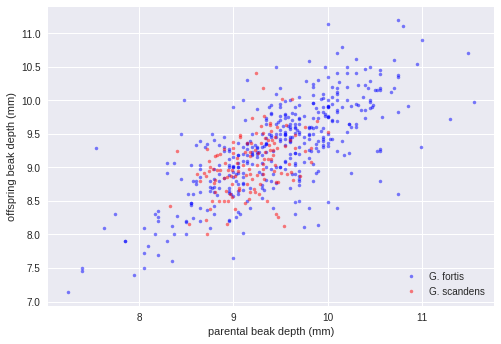

In [0]:
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker=".", linestyle="none", color="blue", alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker=".", linestyle="none", color="red", alpha=0.5)

_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

plt.show()


In [0]:
def draw_bs_pairs(x, y, func, size=1):
    inds = np.arange(len(x))
    bs_replicates = np.empty(size)

    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = np.polyfit(x[bs_inds], y[bs_inds], 1)
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

In [0]:
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)

conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


G. scandens: 0.4117063629401258 [nan nan]
G. fortis: 0.7283412395518484 [nan nan]


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [0]:
def heritability(parents, offspring):
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, heritability, 1000)
replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, heritability, 1000)

conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Degrees of freedom <= 0 for slice
  
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


G. scandens: 0.5485340868685982 [nan nan]
G. fortis: 0.7229051911438156 [nan nan]


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [0]:
perm_replicates = np.empty(10000)

for i in range(10000):
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)

p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


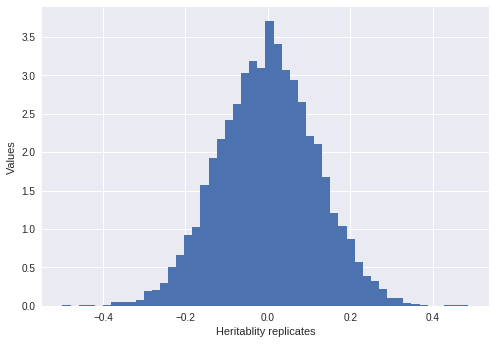

In [0]:
plt.hist(perm_replicates, bins=50, normed=True)
plt.xlabel("Heritablity replicates")
plt.ylabel("Values")
plt.show()